In [65]:
import pandas as pd
import sklearn.datasets
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('ozone_cluster_0.csv')

In [67]:
df

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster,timedelta,formatted_duration
0,e950ecee512fd87a9c20c233ba6ed224acd2c6e4,a01251c8113aee036fd7f229612a33c33cb5e558,1,6,3,1,24978000000000,2006,1130.0,1130.0,734.0,734.0,1003.0,566.0,566.0,367.0,910.0,0,0 days 06:56:18,0 days 06:56:18
1,6035a8b7df6b622eb5bebe7814f81e349bbe7eb3,534160f96c5dae071192ddb809261ec7905ddbcd,4,60,0,6,27174000000000,1002,565.0,565.0,367.0,367.0,990.0,563.0,563.0,365.0,891.0,0,0 days 07:32:54,0 days 07:32:54
2,b9496f9eaf0b9239fcd8b0084d859b4501ccc192,9b59ade990a87a5b8034dcc18be1e997b4f59578,3,72,3,2,43727000000000,1001,565.0,565.0,365.0,365.0,983.0,568.0,568.0,366.0,900.0,0,0 days 12:08:47,0 days 12:08:47
3,e950ecee512fd87a9c20c233ba6ed224acd2c6e4,152cbea1bce867709afb498d55cc4f609aa3f98d,3,393,107,7,116274000000000,2006,1130.0,1130.0,734.0,734.0,998.0,565.0,565.0,365.0,907.0,0,1 days 08:17:54,1 days 08:17:54
4,55de3fb7e9ca2ba9c2f7b854aa09fcc3c2224532,a6ed346744c69d19c1000cb0c3ad75d9dd4fe669,38,132,23,7,193769000000000,996,563.0,563.0,365.0,365.0,990.0,563.0,563.0,365.0,891.0,0,2 days 05:49:29,2 days 05:49:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,d6cbb15f7a29221fcbd8f2c3bc9f5073c12c12d7,c04c01d85452e969ea81d1f8486271e85bff72a9,3,3,2,1,9439818000000000,734,428.0,428.0,241.0,241.0,0.0,0.0,0.0,0.0,0.0,0,109 days 06:10:18,109 days 06:10:18
1796,fe7f5b4ecad81dfff7d7703b69e2eec1907a4a95,e01b47184818365dcb7baf528fb2d874209b6b47,7,428,47,8,5353469000000000,1462,854.0,854.0,482.0,482.0,0.0,0.0,0.0,0.0,0.0,0,61 days 23:04:29,61 days 23:04:29
1797,af4730a54bd2bbc63d556936292ae760701b7e7f,3eb7235ca879498c2d8ebcd5fd228d6e4cb16891,20,39,35,21,10442829000000000,727,427.0,427.0,233.0,233.0,0.0,0.0,0.0,0.0,0.0,0,120 days 20:47:09,120 days 20:47:09
1798,334c6ee65bdc41d0150ad381bbed024a82ea0081,3b89d4daac8747652ee360bac9a0ba1556f12c4f,7,69,0,1,29549932000000000,886,506.0,506.0,298.0,298.0,0.0,0.0,0.0,0.0,0.0,0,342 days 00:18:52,342 days 00:18:52


In [68]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time' , 'timedelta' , 'formatted_duration'])]

In [69]:
scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [70]:
df_scaler.shape

(15, 1800)

In [71]:
df_scaler

array([[7.69230769e-03, 3.07692308e-02, 2.30769231e-02, ...,
        1.53846154e-01, 5.38461538e-02, 2.30769231e-02],
       [4.67398925e-04, 4.67398925e-03, 5.60878710e-03, ...,
        3.03809301e-03, 5.37508764e-03, 1.29313703e-02],
       [4.05734379e-04, 0.00000000e+00, 4.05734379e-04, ...,
        4.73356776e-03, 0.00000000e+00, 5.40979172e-04],
       ...,
       [4.95945946e-01, 4.93243243e-01, 4.94594595e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.96183206e-01, 4.85823337e-01, 4.90730643e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [72]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [73]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [74]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 3


In [75]:
number_of_cluster[0]

[0.5761, 2]

In [76]:
number_of_cluster.sort()

In [77]:
number_of_cluster = number_of_cluster[::-1]

In [78]:
number_of_cluster[:5]

[[0.8774, 3], [0.8077, 4], [0.6274, 7], [0.6221, 5], [0.5921, 8]]

In [79]:
df.shape

(1800, 20)

In [80]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [81]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
df['cluster'] = cluster_labels

In [83]:
df['timedelta'].max()

'98 days 16:13:30'

In [84]:
df['timedelta'].min()

'0 days 00:00:09'

In [85]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['timedelta'].min())
print(cluster_0['timedelta'].max())
cluster_0.shape

0 days 00:00:09
97 days 20:11:40


(890, 20)

In [86]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['timedelta'].min())
print(cluster_1['timedelta'].max())
cluster_1.shape

0 days 00:02:23
98 days 16:13:30


(902, 20)

In [87]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['timedelta'].min())
print(cluster_2['timedelta'].max())
cluster_2.shape

0 days 00:13:10
6 days 17:35:37


(8, 20)

In [88]:
df_scaler.shape

(15, 1800)

In [89]:
def remove_outliers_madn(data, threshold=2.24):
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Calculate modified Z-score for each data point
    modified_z_scores = 0.6745 * (data - median) / mad

    # Identify and remove outliers based on the threshold
    filtered_data = data[abs(modified_z_scores) < threshold]

    return filtered_data

In [103]:
df_scaler

array([[7.69230769e-03, 3.07692308e-02, 2.30769231e-02, ...,
        1.53846154e-01, 5.38461538e-02, 2.30769231e-02],
       [4.67398925e-04, 4.67398925e-03, 5.60878710e-03, ...,
        3.03809301e-03, 5.37508764e-03, 1.29313703e-02],
       [4.05734379e-04, 0.00000000e+00, 4.05734379e-04, ...,
        4.73356776e-03, 0.00000000e+00, 5.40979172e-04],
       ...,
       [4.95945946e-01, 4.93243243e-01, 4.94594595e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.96183206e-01, 4.85823337e-01, 4.90730643e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [98]:
# Example usage
filtered_data = remove_outliers_madn(df_scaler, threshold=2.24)
print("Original data:", df_scaler)
print("Filtered data:", filtered_data)

Original data: [[7.69230769e-03 3.07692308e-02 2.30769231e-02 ... 1.53846154e-01
  5.38461538e-02 2.30769231e-02]
 [4.67398925e-04 4.67398925e-03 5.60878710e-03 ... 3.03809301e-03
  5.37508764e-03 1.29313703e-02]
 [4.05734379e-04 0.00000000e+00 4.05734379e-04 ... 4.73356776e-03
  0.00000000e+00 5.40979172e-04]
 ...
 [4.95945946e-01 4.93243243e-01 4.94594595e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.96183206e-01 4.85823337e-01 4.90730643e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Filtered data: [0.00769231 0.03076923 0.02307692 ... 0.         0.         0.        ]


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


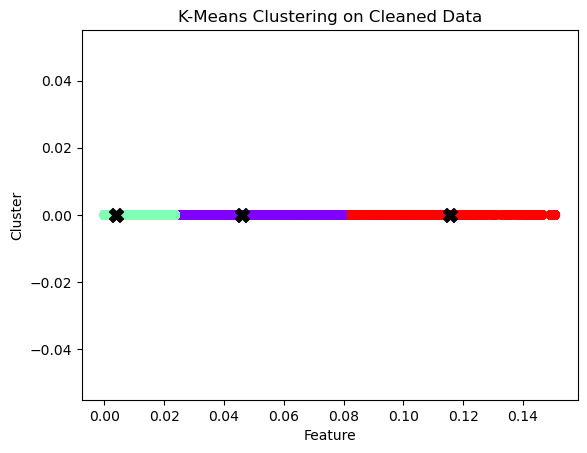

In [99]:
# Reshape the data to a 2D array if needed
cleaned_data = filtered_data.reshape(-1, 1)

# Specify the number of clusters you want to find
n_clusters = 3

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cleaned_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(cleaned_data, np.zeros_like(cleaned_data), c=labels, cmap='rainbow')
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), marker='X', color='black', s=100)
plt.title('K-Means Clustering on Cleaned Data')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [100]:
time_score = df['timedelta']
time_score = pd.DataFrame(time_score)

In [101]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
    lower_boundary_1 = dataframe[col_name].mean() - 1 * dataframe[col_name].std()
    upper_boundary_2 = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary_2 = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return upper_boundary_1, upper_boundary_2 , lower_boundary_1, lower_boundary_2

In [102]:
determine_outlier_thresholds_std(time_score, time_score.columns)

C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_12800\3803180365.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_12800\3803180365.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_12800\3803180365.py:3: FutureWarning: The default value of numeric_only in DataFr

(Series([], dtype: float64),
 Series([], dtype: float64),
 Series([], dtype: float64),
 Series([], dtype: float64))